In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


2024-02-04 19:18:59.180703: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 19:18:59.180801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 19:18:59.472859: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
img_array=cv2.imread(r'/kaggle/input/fer2013/train/angry/Training_10118481.jpg')
img_array.shape

(48, 48, 3)

In [4]:
train_dir = r'/kaggle/input/fer2013/train'
test_dir=r'/kaggle/input/fer2013/test'
classes=['angry','disgust','fear','happy','neutral','sad','surprise']

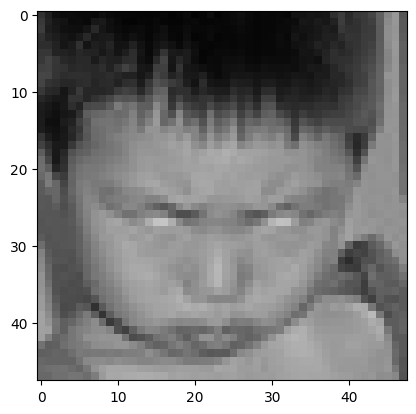

In [5]:
plt.imshow(img_array)

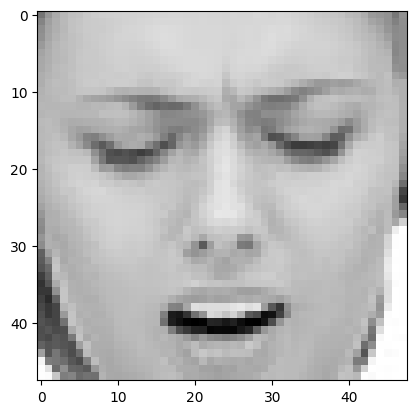

In [12]:

for category in classes:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
        
    break


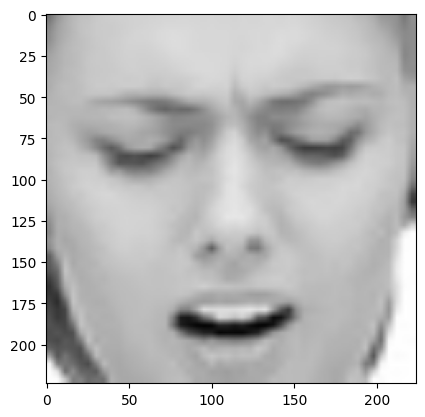

In [13]:
img_size=224 # 224X224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

# read all images and covertin them to array

In [15]:
training_data=[]
def create_training_data():
    
    for category in classes:
        path = os.path.join(train_dir, category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
#                 plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
#                 plt.show()
            except Exception as e:
                pass

In [16]:
create_training_data()

In [17]:
print(len(training_data))

28709


In [18]:
import random
random.shuffle(training_data)

In [19]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)#converting it to 4 dimension
y_train=np.array(y)

In [20]:
# X.shape
# y_train = tf.keras.utils.to_categorical(y)
y[0]

3

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
# model.summary()

# Transfer learning Tuning,Weight will start from check point

In [24]:
base_input=model.layers[0].input #input

In [25]:
base_output=model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output=layers.Dense(128)(base_output)#adding new layer,after the output og global pooling layer
final_output=layers.Activation('relu')(final_output)#activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)## i have 7 classes




In [29]:
final_output #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [30]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
# new_model.summary()

In [31]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])



In [33]:
new_model.fit(X,y_train ,epochs=10)

Epoch 1/10
898/898 [==============================] - 111s 123ms/step - loss: 0.7419 - accuracy: 0.7254
Epoch 2/10
898/898 [==============================] - 110s 123ms/step - loss: 0.6911 - accuracy: 0.7467
Epoch 3/10
898/898 [==============================] - 110s 122ms/step - loss: 0.6402 - accuracy: 0.7681
Epoch 4/10
898/898 [==============================] - 110s 122ms/step - loss: 0.5875 - accuracy: 0.7880
Epoch 5/10
898/898 [==============================] - 110s 123ms/step - loss: 0.5371 - accuracy: 0.8028
Epoch 6/10
898/898 [==============================] - 110s 123ms/step - loss: 0.4935 - accuracy: 0.8210
Epoch 7/10
898/898 [==============================] - 110s 123ms/step - loss: 0.4497 - accuracy: 0.8364
Epoch 8/10
898/898 [==============================] - 110s 123ms/step - loss: 0.4122 - accuracy: 0.8511
Epoch 9/10
898/898 [==============================] - 110s 123ms/step - loss: 0.3749 - accuracy: 0.8647
Epoch 10/10
898/898 [==============================] - 110s 122m

In [34]:
new_model.save('Final_model_95p07.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


est data ,i will not use test ,deploy live image demo

In [50]:
# Charger les données de test de manière similaire à la création des données d'entraînement
testing_data = []

def create_testing_data():
    for category in classes:
        path = os.path.join(test_dir, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass




In [51]:
create_testing_data()


In [53]:
random.shuffle(testing_data)



In [55]:

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)


In [56]:
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)



In [57]:
# Évaluer le modèle sur les données de test
evaluation = new_model.evaluate(X_test, y_test)
print("Test Accuracy:", evaluation[1])

225/225 [==============================] - 10s 37ms/step - loss: 1.7503 - accuracy: 0.5528
Test Accuracy: 0.5528002381324768


In [60]:

for layer in new_model.layers[-10:]:
    layer.trainable = True

new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

new_model.fit(X_test, y_test, epochs=15)


Epoch 1/15
225/225 [==============================] - 50s 131ms/step - loss: 0.9806 - accuracy: 0.6491
Epoch 2/15
225/225 [==============================] - 28s 122ms/step - loss: 0.7062 - accuracy: 0.7478
Epoch 3/15
225/225 [==============================] - 27s 122ms/step - loss: 0.5408 - accuracy: 0.8096
Epoch 4/15
225/225 [==============================] - 28s 123ms/step - loss: 0.4064 - accuracy: 0.8596
Epoch 5/15
225/225 [==============================] - 28s 123ms/step - loss: 0.3144 - accuracy: 0.8877
Epoch 6/15
225/225 [==============================] - 27s 122ms/step - loss: 0.2426 - accuracy: 0.9147
Epoch 7/15
225/225 [==============================] - 28s 122ms/step - loss: 0.2062 - accuracy: 0.9267
Epoch 8/15
225/225 [==============================] - 28s 123ms/step - loss: 0.1750 - accuracy: 0.9432
Epoch 9/15
225/225 [==============================] - 28s 122ms/step - loss: 0.1486 - accuracy: 0.9500
Epoch 10/15
225/225 [==============================] - 27s 122ms/step - l

In [61]:
new_model=tf.keras.models.load_model('Final_model_95p07.h5')